# Zipline Pipeline

In [1]:
import pandas as pd
import yfinance as yf
import tqdm
import logging
import os

# Set up logging to capture errors
logging.basicConfig(filename='download_errors.log', level=logging.ERROR)

# Load CSV data
df = pd.read_csv('https://raw.githubusercontent.com/rbpal/01-qt-project-03-smart-beta-portfolio-optimization/main/eod-quotemedia.csv', index_col=False)

# Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Define output directory
output_dir = '../Data/data/eod-quotemedia/daily'
os.makedirs(output_dir, exist_ok=True)

# Group by ticker and process each group
for ticker, group in tqdm.tqdm(df.groupby('ticker')):
    # Ensure 'date' is sorted and in datetime format
    group = group.sort_values('date')
    
    # Get the start and end dates for this ticker
    start_session = pd.Timestamp('2013-07-01', tz='UTC')
    end_session = pd.Timestamp('2017-06-30', tz='UTC')
    
    try:
        # Download data from yfinance
        dat = yf.download(ticker, start=start_session, end=end_session, progress=False)
        
        # Check if data is returned
        if dat.empty:
            print(f"No data returned for {ticker}.")
            continue

        # Rename columns to match expected format
        dat.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']
        
        # Rename index and ensure it's in datetime format
        dat.index.name = 'date'
        dat.index = dat.index.tz_localize(None)  # Remove timezone if needed
        
        # Write data to a CSV file with the ticker name
        dat.to_csv(f'{output_dir}/{ticker}.csv', index=True)

    except Exception as e:
        # Log and print errors
        print(f"Error processing {ticker}: {e}")
        logging.error(f"Error processing {ticker}: {e}")

    # Break statement is for debugging; remove in production



  1%|          | 6/495 [00:05<09:19,  1.14s/it]

No data returned for ABC.


  3%|▎         | 13/495 [00:09<06:33,  1.22it/s]

No data returned for ADS.


  4%|▍         | 20/495 [00:12<05:55,  1.34it/s]

No data returned for AGN.


  6%|▋         | 31/495 [00:17<04:40,  1.65it/s]

No data returned for ALXN.


  8%|▊         | 42/495 [00:22<05:05,  1.48it/s]

No data returned for ANTM.


  9%|▉         | 46/495 [00:24<05:42,  1.31it/s]

No data returned for APC.


 10%|█         | 50/495 [00:27<06:54,  1.07it/s]

No data returned for ARNC.


 10%|█         | 51/495 [00:30<09:49,  1.33s/it]

No data returned for ATVI.


 13%|█▎        | 62/495 [00:36<07:10,  1.01it/s]

No data returned for BBT.


 13%|█▎        | 64/495 [00:36<04:26,  1.62it/s]

$BCR: possibly delisted; No price data found  (1d 2013-07-01 00:00:00+00:00 -> 2017-06-30 00:00:00+00:00)
No data returned for BCR.


 14%|█▍        | 70/495 [00:40<06:46,  1.04it/s]

No data returned for BLL.


 15%|█▌        | 76/495 [00:44<06:48,  1.02it/s]

No data returned for CA.


 16%|█▋        | 81/495 [00:46<02:52,  2.40it/s]

$CBG: possibly delisted; No price data found  (1d 2013-07-01 00:00:00+00:00 -> 2017-06-30 00:00:00+00:00)
No data returned for CBG.


 17%|█▋        | 83/495 [00:48<05:18,  1.29it/s]

No data returned for CBS.


 17%|█▋        | 86/495 [00:50<05:32,  1.23it/s]

No data returned for CELG.


 18%|█▊        | 87/495 [00:52<07:43,  1.14s/it]

No data returned for CERN.


 18%|█▊        | 91/495 [00:55<06:43,  1.00it/s]

No data returned for CHK.


 22%|██▏       | 107/495 [01:04<06:58,  1.08s/it]

No data returned for COG.


 24%|██▍       | 119/495 [01:10<05:33,  1.13it/s]

No data returned for CTL.


 24%|██▍       | 121/495 [01:12<06:57,  1.12s/it]

No data returned for CTXS.


 25%|██▌       | 124/495 [01:15<06:17,  1.02s/it]

No data returned for CXO.


 27%|██▋       | 134/495 [01:20<05:21,  1.12it/s]

No data returned for DISCA.


 27%|██▋       | 135/495 [01:22<07:06,  1.18s/it]

No data returned for DISCK.


 27%|██▋       | 136/495 [01:24<08:26,  1.41s/it]

No data returned for DISH.


 28%|██▊       | 140/495 [01:25<03:18,  1.79it/s]

$DPS: possibly delisted; No price data found  (1d 2013-07-01 00:00:00+00:00 -> 2017-06-30 00:00:00+00:00)No data returned for DPS.



 28%|██▊       | 141/495 [01:27<05:04,  1.16it/s]

No data returned for DRE.


 33%|███▎      | 164/495 [01:37<04:07,  1.34it/s]

No data returned for ETFC.


 35%|███▌      | 175/495 [01:42<04:03,  1.31it/s]

No data returned for FB.


 36%|███▌      | 176/495 [01:44<06:16,  1.18s/it]

No data returned for FBHS.


 37%|███▋      | 182/495 [01:47<04:27,  1.17it/s]

No data returned for FISV.


 37%|███▋      | 185/495 [01:50<04:56,  1.04it/s]

No data returned for FLIR.


 38%|███▊      | 189/495 [01:53<04:52,  1.04it/s]

No data returned for FOX.


 38%|███▊      | 190/495 [01:55<06:06,  1.20s/it]

No data returned for FOXA.


 40%|███▉      | 196/495 [01:57<02:16,  2.18it/s]

$GGP: possibly delisted; No price data found  (1d 2013-07-01 00:00:00+00:00 -> 2017-06-30 00:00:00+00:00)
No data returned for GGP.


 43%|████▎     | 215/495 [02:04<01:24,  3.30it/s]

$HCN: possibly delisted; No price data found  (1d 2013-07-01 00:00:00+00:00 -> 2017-06-30 00:00:00+00:00)
No data returned for HCN.


 44%|████▎     | 216/495 [02:06<03:50,  1.21it/s]

No data returned for HCP.


 46%|████▋     | 229/495 [02:12<03:35,  1.24it/s]

No data returned for HRS.


 48%|████▊     | 240/495 [02:18<03:08,  1.35it/s]

No data returned for INFO.


 51%|█████     | 253/495 [02:23<03:02,  1.33it/s]

No data returned for JEC.


 54%|█████▍    | 267/495 [02:29<01:11,  3.19it/s]

$KORS: possibly delisted; No price data found  (1d 2013-07-01 00:00:00+00:00 -> 2017-06-30 00:00:00+00:00)No data returned for KORS.



 55%|█████▍    | 270/495 [02:31<03:10,  1.18it/s]

No data returned for KSU.


 55%|█████▍    | 272/495 [02:33<03:47,  1.02s/it]

No data returned for LB.


 56%|█████▌    | 277/495 [02:37<03:10,  1.14it/s]

No data returned for LLL.


 57%|█████▋    | 284/495 [02:39<01:11,  2.93it/s]

$LUK: possibly delisted; No price data found  (1d 2013-07-01 00:00:00+00:00 -> 2017-06-30 00:00:00+00:00)
No data returned for LUK.


 58%|█████▊    | 286/495 [02:40<01:04,  3.22it/s]

$LVLT: possibly delisted; No price data found  (1d 2013-07-01 00:00:00+00:00 -> 2017-06-30 00:00:00+00:00)
No data returned for LVLT.


 62%|██████▏   | 309/495 [02:50<02:28,  1.26it/s]

No data returned for MON.


 65%|██████▍   | 320/495 [02:54<01:53,  1.55it/s]

No data returned for MYL.


 65%|██████▌   | 322/495 [03:26<27:59,  9.71s/it]

No data returned for NBL.


 65%|██████▌   | 323/495 [03:56<45:20, 15.82s/it]

No data returned for NDAQ.


 65%|██████▌   | 324/495 [04:06<40:08, 14.08s/it]

No data returned for NEE.


 66%|██████▌   | 325/495 [04:16<36:28, 12.87s/it]

No data returned for NEM.


 66%|██████▌   | 326/495 [04:53<56:44, 20.14s/it]

No data returned for NFLX.


 66%|██████▌   | 327/495 [05:04<48:15, 17.23s/it]

No data returned for NFX.


 66%|██████▌   | 327/495 [05:04<02:36,  1.07it/s]


KeyboardInterrupt: 

In [3]:
import pyfolio as pf

In [15]:
import pandas as pd
from zipline.data.bundles import register, ingest
from zipline.data.bundles.csvdir import csvdir_equities
import logging

# Set up logging to capture errors
logging.basicConfig(filename='bundle_errors.log', level=logging.ERROR)

# Define the bundle name and session dates
# Ensure these timestamps are timezone-naive or all timezone-aware (consistent with your data)
start_session = pd.Timestamp('2013-07-01')  # Timezone-naive
end_session = pd.Timestamp('2017-06-30')    # Timezone-naive


try:
    # Register the bundle
    register(
        'eod-quotemedia',
        csvdir_equities(
            ['daily'],  # This specifies the frequency directory
            '/home/ankit/AI_for_trading/Data/data/eod-quotemedia/'  # Path to the directory containing data
        ),
        calendar_name='XNYS',  # US equities
        start_session=start_session,
        end_session=end_session
    )

    # Ingest the bundle
    # ingest('eod-quotemedia')

    print("Bundle registration and ingestion completed.")

except Exception as e:
    # Log and print errors
    print(f"Error during bundle registration or ingestion: {e}")
    logging.error(f"Error during bundle registration or ingestion: {e}")


Bundle registration and ingestion completed.


/tmp/ipykernel_17919/1850159331.py:17: UserWarning: Overwriting bundle with name 'eod-quotemedia'
  register(


In [2]:
import zipline
from zipline.api import order, record, symbol
from zipline.algorithm import TradingAlgorithm
from zipline.data import bundles
from zipline.utils.calendar_utils import get_calendar
from datetime import datetime

# Load the custom bundle
bundle_name = 'eod-quotemedia'
bundle_data = bundles.load(bundle_name)

# Define the trading calendar (e.g., NYSE)
trading_calendar = get_calendar('NYSE')

# Define a simple algorithm
def initialize(context):
    context.asset = symbol('A')

def handle_data(context, data):
    order(context.asset, 10)
    record(A=data.current(context.asset, 'price'))

# Define the start and end date for the backtest
start_date = pd.Timestamp('2013-07-01', tz='utc')
end_date = pd.Timestamp('2017-06-30', tz='utc')

# Create the algorithm object
algo = TradingAlgorithm


In [16]:
import zipline
from zipline.data import bundles

# Load the custom bundle
bundle_name = 'eod-quotemedia'
bundle_data = bundles.load(bundle_name)

# Access the AssetFinder
asset_finder = bundle_data.asset_finder

# Get all assets in the bundle
assets = asset_finder.retrieve_all(asset_finder.sids)

# Print metadata for all assets
for asset in assets:
    print(f"Asset ID: {asset.sid}")
    print(f"Symbol: {asset.symbol}")
    print(f"Start Date: {asset.start_date}")
    print(f"End Date: {asset.end_date}")
    print(f"Exchange: {asset.exchange}")
    print("---------------------------")


Asset ID: 0
Symbol: A
Start Date: 2013-07-01 00:00:00
End Date: 2017-06-29 00:00:00
Exchange: CSVDIR
---------------------------
Asset ID: 1
Symbol: AAL
Start Date: 2013-07-01 00:00:00
End Date: 2017-06-29 00:00:00
Exchange: CSVDIR
---------------------------
Asset ID: 2
Symbol: AAP
Start Date: 2013-07-01 00:00:00
End Date: 2017-06-29 00:00:00
Exchange: CSVDIR
---------------------------
Asset ID: 3
Symbol: AAPL
Start Date: 2013-07-01 00:00:00
End Date: 2017-06-29 00:00:00
Exchange: CSVDIR
---------------------------


In [37]:
import sqlite3
# Path to your bundle's assets database
bundle_db_path = '../Data/data/eod-quotemedia/2024-09-04T09;37;22.939161/assets-7.sqlite'

# Connect to the SQLite database
conn = sqlite3.connect(bundle_db_path)
cursor = conn.cursor()

# Execute a query to list all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results from the executed query
tables = cursor.fetchall()

# Print the list of tables
for table in tables:
    print(table[0])

# Close the connection
conn.close()

exchanges
asset_router
version_info
equities
futures_root_symbols
equity_symbol_mappings
equity_supplementary_mappings
futures_contracts


# Building an Empty Pipeline

Once we have loaded our data, we can start building our Zipline pipeline. We begin by creating an empty Pipeline object using Zipline's `Pipeline` class. A Pipeline object represents a collection of named expressions to be compiled and executed by a Pipeline Engine. The `Pipeline(columns=None, screen=None)` class takes two optional parameters, `columns` and `screen`. The `columns` parameter is a dictionary used to indicate the intial columns to use, and the `screen` parameter is used to setup a screen to exclude unwanted data. 

In the code below we will create a `screen` for our pipeline using Zipline's built-in `.AverageDollarVolume()` class. We will use the `.AverageDollarVolume()` class to produce a 60-day Average Dollar Volume of closing prices for every stock in our universe. We then use the `.top(10)` attribute to specify that we want to filter down our universe each day to just the top 10 assets. Therefore, this screen will act as a filter to exclude data from our stock universe each day. The average dollar volume is a good first pass filter to avoid illiquid assets.

In [17]:
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume
from zipline.pipeline.domain import US_EQUITIES

# Create a screen for our Pipeline
universe = AverageDollarVolume(window_length = 60).top(10)

# Create an empty Pipeline with the given screen
pipeline = Pipeline(screen = universe,domain=US_EQUITIES)

# Datasets and Dataloaders               

One of the features of Zipline's Pipeline is that it separates the actual source of the stock data from the abstract description of that dataset. Therefore, Zipline employs **DataSets** and **Loaders** for those datasets. `DataSets` are just abstract collections of sentinel values describing the columns/types for a particular dataset.  While a `loader` is an object which, given a request for a particular chunk of a dataset, can actually get the requested data. For example, the loader used for the `USEquityPricing` dataset, is the `USEquityPricingLoader` class. The `USEquityPricingLoader` class will delegate the loading of baselines and adjustments to lower-level subsystems that know how to get the pricing data in the default formats used by Zipline (`bcolz` for pricing data, and `SQLite` for split/merger/dividend data). As we saw in the beginning of this notebook, data bundles automatically convert the stock data into `bcolz` and `SQLite` formats. It is important to note that the `USEquityPricingLoader` class can also be used to load daily OHLCV data from other datasets, not just from the `USEquityPricing` dataset. Simliarly, it is also  possible to write different loaders for the same dataset and use those instead of the default loader. Zipline contains lots of other loaders to allow you to load data from different datasets.

In the code below, we will use `USEquityPricingLoader(BcolzDailyBarWriter, SQLiteAdjustmentWriter)` to create a loader from a `bcolz` equity pricing directory and a `SQLite` adjustments path. Both the `BcolzDailyBarWriter` and `SQLiteAdjustmentWriter` determine the path of the pricing and adjustment data. Since we will be using the Quotemedia data bundle, we will use the `bundle_data.equity_daily_bar_reader` and the `bundle_data.adjustment_reader` as our `BcolzDailyBarWriter` and `SQLiteAdjustmentWriter`, respectively.

In [19]:
from zipline.pipeline.loaders import USEquityPricingLoader

# Set the dataloader
pricing_loader = USEquityPricingLoader(bundle_data.equity_daily_bar_reader, bundle_data.adjustment_reader,fx_reader=None)

In [21]:
import zipline.utils.calendar_utils as utils
from zipline.pipeline.data import USEquityPricing
from zipline.pipeline.engine import SimplePipelineEngine

# Define the function for the get_loader parameter
def choose_loader(column):
    if column not in USEquityPricing.columns:
        raise Exception('Column not in USEquityPricing')
    return pricing_loader

# Set the trading calendar
trading_calendar = utils.get_calendar('XNYS')

# Create a Pipeline engine
engine = SimplePipelineEngine(get_loader = choose_loader,
                              asset_finder = bundle_data.asset_finder)

In [22]:
from zipline.data.bundles import  load

bundle_data = load('eod-quotemedia')
first_trading_day = bundle_data.equity_daily_bar_reader.first_trading_day
last_trading_day = bundle_data.equity_daily_bar_reader.last_available_dt

print(f"First trading day: {first_trading_day}")
print(f"Last trading day: {last_trading_day}")

First trading day: 2013-07-01 00:00:00
Last trading day: 2017-06-30 00:00:00


In [23]:
import pandas as pd

# Set the start and end dates
start_date = pd.Timestamp('2016-01-05')
end_date = pd.Timestamp('2016-01-06')


# check if start_date is in sessions

# all_sessions = pipeline.domain(default=US_EQUITIES).sessions().to_list()

# session_in_2016 = [session for session in all_sessions if session >= start_date]
# in the list of all sessions containing the Timestamps filter between start_date and end_date


# Run our pipeline for the given start and end dates
pipeline_output = engine.run_pipeline(pipeline, start_date, end_date)

# We print information about the pipeline output
print('The pipeline output has type:', type(pipeline_output), '\n')

# We print whether the pipeline output is a MultiIndex Dataframe
print('Is the pipeline output a MultiIndex Dataframe:', isinstance(pipeline_output.index, pd.core.index.MultiIndex), '\n')

# If the pipeline output is a MultiIndex Dataframe we print the two levels of the index
if isinstance(pipeline_output.index, pd.core.index.MultiIndex):

    # We print the index level 0
    print('Index Level 0:\n\n', pipeline_output.index.get_level_values(0), '\n')

    # We print the index level 1
    print('Index Level 1:\n\n', pipeline_output.index.get_level_values(1), '\n')

ValueError: Failed to find any assets with country_code 'US' that traded between 2016-01-05 00:00:00 and 2016-01-06 00:00:00.
This probably means that your asset db is old or that it has incorrect country/exchange metadata.

/home/ankit/.zipline/extension.py:25: UserWarning: Overwriting bundle with name 'yahoo_NYSE'
  register(
/tmp/ipykernel_11712/4170722930.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if equities_hist[-1]> equities_hist.mean():
/home/ankit/miniconda3/envs/ML/lib/python3.9/site-packages/zipline/finance/ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns
/home/ankit/miniconda3/envs/ML/lib/python3.9/site-packages/pyfolio/plotting.py:650: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future ve

Start date,2014-01-02
End date,2014-12-31
Total months,12
,Backtest
Annual return,12.3%
Cumulative returns,12.3%
Annual volatility,19.1%
Sharpe ratio,0.70
Calmar ratio,0.70
Stability,0.63
Max drawdown,-17.6%


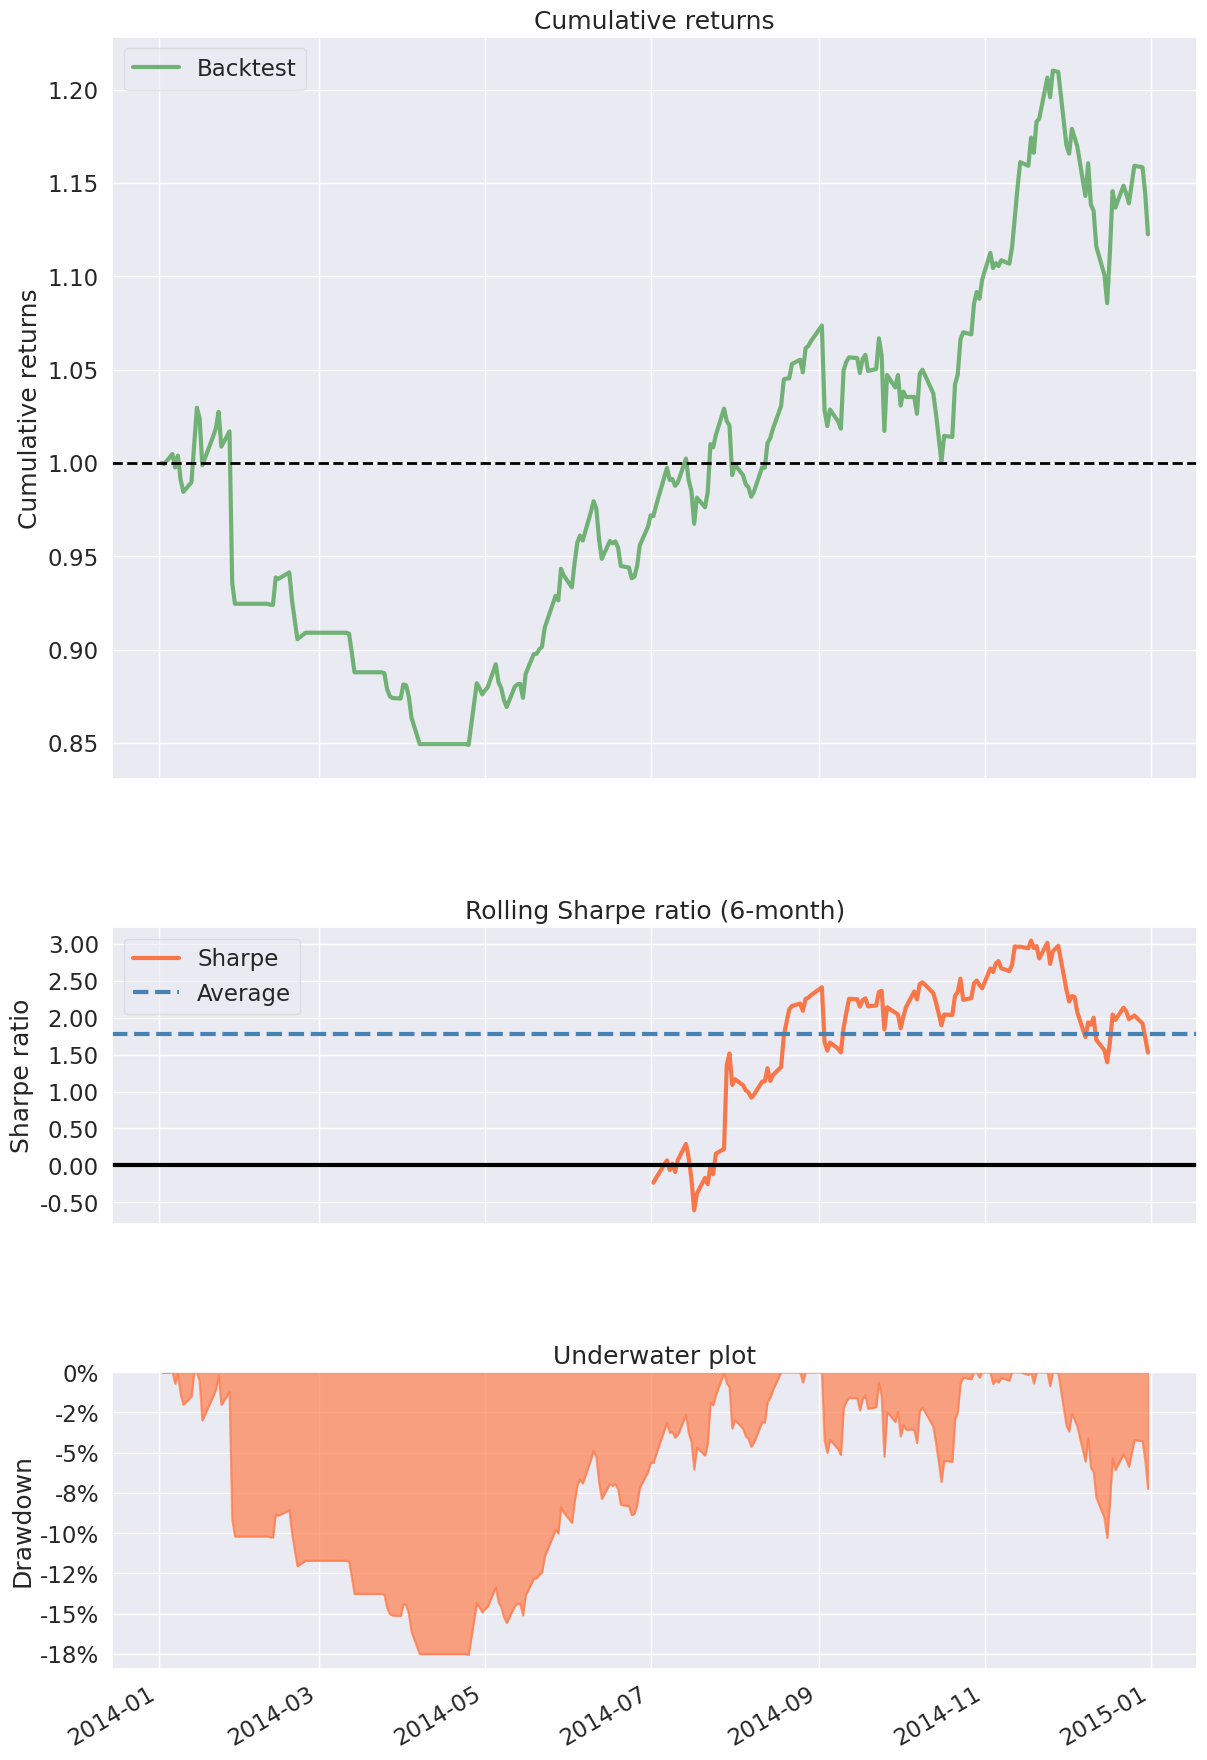

In [1]:
import pandas as pd
from zipline.api import order, record, symbol, schedule_function, attach_pipeline, pipeline_output,order_target_percent
from zipline.utils.events import date_rules, time_rules
from zipline import run_algorithm
from zipline.data.bundles import register
from zipline.utils.calendar_utils import get_calendar
from zipline.utils.events import date_rules, time_rules
from zipline.utils.cli import maybe_show_progress
from zipline.data.bundles import register
from zipline.data.bundles.csvdir import csvdir_equities
from zipline.pipeline.factors import AverageDollarVolume
from zipline.pipeline import Pipeline
import pyfolio as pf
import pytz

from datetime import datetime

# Define your trading algorithm
def initialize(context):
    context.asset = symbol('AAPL')
    
    context.index_average_window = 100

def handle_data(context, data):
    # Get the average dollar volume for the index
    equities_hist = data.history(context.asset, 'close', context.index_average_window, '1d')
    
    if equities_hist[-1]> equities_hist.mean():
        order_target_percent(context.asset, 1)
    else:
        order_target_percent(context.asset, 0)


def analyze(context,perf):
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)

    pf.create_simple_tear_sheet(returns)


# Define the start and end dates for the backtest
start = pd.Timestamp('2014-1-1').replace(tzinfo=None)
end = pd.Timestamp('2015-1-1').replace(tzinfo=None)

# Register the custom data bundle
# Run the backtest
data = run_algorithm(
    start=start,
    end=end,
    initialize=initialize,
    analyze=analyze,
    handle_data=handle_data,
    bundle='yahoo_NYSE',
    data_frequency='daily',
    capital_base=10000,
)

# # Print the results
# print(data.head())
